In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
url='http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&root=178401812&tvd=27820001217432&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217432&type=222'
data=pd.read_html(url,encoding='CP1251')

In [2]:
k=np.transpose(data[6].drop(12))
name=k.iloc[1,:] 
name[0]='Номера УИК'
print(name)

0                                            Номера УИК
1     Число избирателей, внесенных в список избирате...
2     Число избирательных бюллетеней, полученных уча...
3     Число избирательных бюллетеней, выданных избир...
4     Число избирательных бюллетеней, выданных избир...
5             Число погашенных избирательных бюллетеней
6     Число избирательных бюллетеней, содержащихся в...
7     Число избирательных бюллетеней, содержащихся в...
8       Число недействительных избирательных бюллетеней
9         Число действительных избирательных бюллетеней
10            Число утраченных избирательных бюллетеней
11    Число избирательных бюллетеней, не учтенных пр...
13                               Амосов Михаил Иванович
14                          Беглов Александр Дмитриевич
15                         Тихонова Надежда Геннадьевна
Name: 1, dtype: object


In [3]:
data=np.transpose(data[7].drop(12))
data.columns=name 

from IPython.core.display import display 
display(data) 

1,Номера УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,УИК №252,2277,2000,677,4,1319,4,669,18,655,0,0,185 27.49%,337 50.07%,133 19.76%
1,УИК №253,2313,2000,690,9,1301,9,687,26,670,0,0,164 23.56%,380 54.60%,126 18.10%
2,УИК №254,1676,1500,464,9,1027,9,464,14,459,0,0,98 20.72%,271 57.29%,90 19.03%
3,УИК №255,2376,2000,706,8,1286,8,705,18,695,0,0,148 20.76%,395 55.40%,152 21.32%
4,УИК №256,2451,2000,620,4,1376,4,616,19,601,0,0,133 21.45%,340 54.84%,128 20.65%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,УИК №311,1531,1300,346,3,951,3,334,16,321,0,0,75 22.26%,150 44.51%,96 28.49%
60,УИК №312,2584,2000,618,7,1375,7,618,10,615,0,0,136 21.76%,279 44.64%,200 32.00%
61,УИК №313,1659,1500,362,3,1135,3,359,8,354,0,0,78 21.55%,170 46.96%,106 29.28%
62,УИК №314,1876,1500,438,6,1056,6,438,11,433,0,0,100 22.52%,207 46.62%,126 28.38%


In [4]:
#разделяем голоса и проценты
for i in range(12,15):
    split=data.iloc[:,i]
    split1=[]
    split2=[]
    for j in range(len(data)):
        text=split[j].split()
        split1.append(int(text[0]))
        split2.append(float(text[1].replace('%','')))
    data.iloc[:,i]=(split1)
    data['%'+str(data.columns.values[i])]=(split2)

In [5]:
#выделяем УИК с нужного округа
data=data.loc[('УИК №291')<=data['Номера УИК']]
data=data.loc[data['Номера УИК']<=('УИК №309')]
data=data.reset_index(drop=True)

In [6]:
for i in range(data.shape[0]):
    for j in range(1,(data.shape[0]-3)):
        data.iloc[i,j]=int(data.iloc[i,j])
data.dtypes #подготовка данных закончена

1
Номера УИК                                                                                              object
Число избирателей, внесенных в список избирателей на момент окончания голосования                        int64
Число избирательных бюллетеней, полученных участковой избирательной комиссией                            int64
Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования      int64
Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования      int64
Число погашенных избирательных бюллетеней                                                                int64
Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования                         int64
Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования                       int64
Число недействительных избирательных бюллетеней                                                          int64

In [8]:
#Вывод процентного соотношения явки на выборы
yavka=[]
for i in range(len(data)):
    yavka.append(round(100*float(data.iloc[i,3]/data.iloc[i,1]),2))
yavka=pd.DataFrame(yavka, columns=['Явка'])
yavka.T
print(yavka)

     Явка
0   26.30
1   32.03
2   23.47
3   24.39
4   38.68
5   30.86
6   28.81
7   33.52
8   28.01
9   31.90
10  29.91
11  25.06
12  27.34
13  23.97
14  25.92
15  22.93
16  23.86
17  21.88
18  30.61


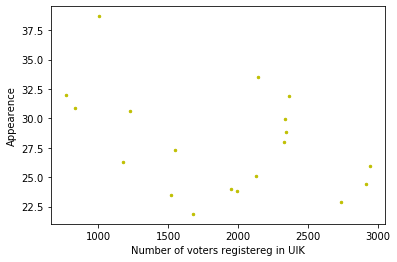

In [9]:
#зависимость явки от количества избирателей на участке
x=yavka['Явка']
y=data.iloc[:,1]
plt.scatter(y,x, c = 'y', s = 6)
plt.xlabel('Number of voters registereg in UIK')
plt.ylabel('Appearence')
plt.show()

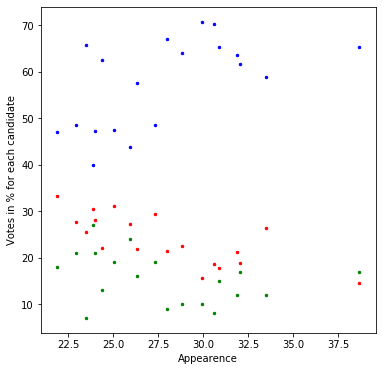

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(yavka['Явка'],data.iloc[:,15], c = 'g', s = 6)#Амосов
plt.scatter(yavka['Явка'],data.iloc[:,16], c = 'b', s = 6)#Беглов
plt.scatter(yavka['Явка'],data.iloc[:,17], c = 'r', s = 6)#Тихонова
plt.ylabel('Votes in % for each candidate')
plt.xlabel('Appearence')
plt.show()

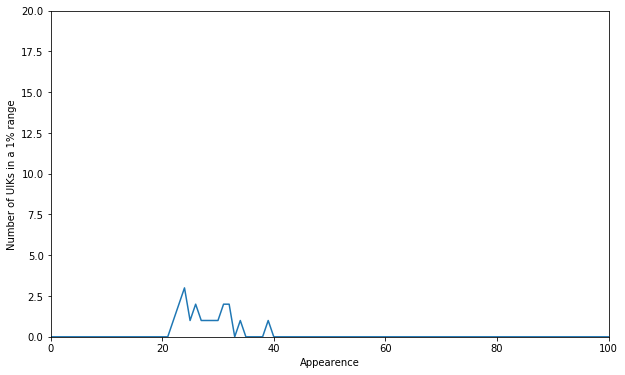

In [11]:
interval = 1

interval_num_of_UIKs = []

for i in range (int(100/interval+1/interval)):
    interval_num_of_UIKs.append(0)

for i in range (0, int(100/interval+1/interval), interval):
    for j in range (len(yavka)):
        if yavka.iloc[j,0] < (i + interval/2) and yavka.iloc[j,0] >= (i - interval/2):
            interval_num_of_UIKs[i] = interval_num_of_UIKs[i] + 1
            
plt.figure(figsize=(10, 6))
plt.plot(interval_num_of_UIKs)
plt.axis([0, 100, 0, 20])
plt.ylabel('Number of UIKs in a 1% range')
plt.xlabel('Appearence')
plt.show()